# MXN442 Assignment 1
- Student Number: 10515402
- First Name: Aidan
- Last Name: Lockwood

## Assignment Setup
Installing required libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ISLP.models import ModelSpec as MS
import statsmodels.api as sm
import seaborn as sns

from sklearn.preprocessing import StandardScaler

Loading required data

In [2]:
df = pd.read_csv('data/assignment1_data.csv')
df

,age,income,credit_score,years_employed,debt_to_income,num_credit_cards,education,marital_status,credit_limit,loan_default
0,52,25874.0,569,3.9,0.269,5,1,0,9131,0
1,43,NaN,613,0.1,0.059,5,0,1,9690,0
2,55,20000.0,578,18.3,0.088,2,2,1,15311,0
3,68,27887.0,663,6.0,0.182,3,3,0,13221,0
4,41,65268.0,794,15.2,0.162,3,3,0,24805,0
...,...,...,...,...,...,...,...,...,...,...
4995,44,102835.0,541,3.5,0.134,3,0,1,22262,0
4996,56,20000.0,798,NaN,0.288,3,2,1,8700,0
4997,80,20656.0,807,7.6,0.252,5,1,1,9876,0
4998,57,53993.0,544,3.4,0.422,2,1,1,8790,0


## Question 1: Linear Regression and Model Selection (12 Marks)

Banks need to set appropriate credit limits for customers based on their financial profiles. Setting limits too low may result in lost revenue opportunities, while setting them too high increases exposure to potential losses. The challenge is to develop a model that can accurately predict optimal credit limits using customer demographic, financial, and behavioural characteristics.

<b>a) Multiple Linear Regression (3 marks) </b>
- Handle missing values using mean imputation 
- Split data into training (70%) and test (30%) sets. Fit a multiple linear regression model using all features to predict `credit_limit` (1) 
- Interpret the coefficients of the three most significant predictors (1)

Handling the missing values using mean imputation

In [3]:
# Checking for the missing values in the dataset
data_columns = df.columns.to_list()

for column in data_columns:
    print(f'Column {column} has {df[column].isna().sum()} missing values')

Column age has 0 missing values
Column income has 150 missing values
Column credit_score has 0 missing values
Column years_employed has 150 missing values
Column debt_to_income has 0 missing values
Column num_credit_cards has 0 missing values
Column education has 0 missing values
Column marital_status has 0 missing values
Column credit_limit has 0 missing values
Column loan_default has 0 missing values


It appears that both `income` and `years_employed` have missing values. Thus the mean will be calculated for those values. The mean for each variable will be input into the NaN values

In [4]:
df['income'].mean()

np.float64(51458.36804123711)

In [5]:
# Calculating the mean values 
mean_income = round(df['income'].mean(), 2)
mean_years_employed = round(df['years_employed'].mean(), 2)

# Replacing the NaN values for each column with their respective means 
df['income'] = df['income'].fillna(mean_income)
df['years_employed'] = df['years_employed'].fillna(mean_years_employed)

# Checking the fill worked
for column in data_columns:
    print(f'Column {column} has {df[column].isna().sum()} missing values')

Column age has 0 missing values
Column income has 0 missing values
Column credit_score has 0 missing values
Column years_employed has 0 missing values
Column debt_to_income has 0 missing values
Column num_credit_cards has 0 missing values
Column education has 0 missing values
Column marital_status has 0 missing values
Column credit_limit has 0 missing values
Column loan_default has 0 missing values


The mean imputation has been completed.

Now time to split data into training and test splits, then generate a multiple linear regression model, fitting it to the training data.

In [6]:
df_size = df.shape[0]

training_size = int(df_size * 0.7)
test_size = df_size - training_size

training_data = df[0:training_size]
test_data = df[training_size:]

In [9]:
test_data

,age,income,credit_score,years_employed,debt_to_income,num_credit_cards,education,marital_status,credit_limit,loan_default
3500,63,269510.0,702,9.00,0.107,4,0,0,48686,0
3501,36,25303.0,678,2.70,0.628,1,2,0,2883,0
3502,46,165399.0,742,16.30,0.053,3,0,0,39412,0
3503,46,29421.0,715,11.00,0.039,3,1,1,14974,0
3504,37,20000.0,736,4.40,0.140,5,0,2,10242,0
...,...,...,...,...,...,...,...,...,...,...
4995,44,102835.0,541,3.50,0.134,3,0,1,22262,0
4996,56,20000.0,798,8.26,0.288,3,2,1,8700,0
4997,80,20656.0,807,7.60,0.252,5,1,1,9876,0
4998,57,53993.0,544,3.40,0.422,2,1,1,8790,0


Now to fit the data to a MLR.
Note that:
- `credit_limit` is the response variable

In [ ]:
training_predictors = training_data.columns.drop(['credit_limit']).to_list()
training_data_X = training_data.drop(columns = ['credit_limit'])

train_design = MS(['income'])
train_design = train_design.fit(training_data)
X_train = train_design.transform(training_data_X)

# Experimenting with adjusting the scaling of the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

mlr_model = sm.OLS(training_data['credit_limit'], X_train)

results = mlr_model.fit()
results.summary()

## The result of standardising the X_train put the condition number to infinity
## Not standardising but adding all variables minus the response resulted in a large condition number

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           credit_limit   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     558.6
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          1.04e-114
Time:                        19:58:12   Log-Likelihood:                -36298.
No. Observations:                3500   AIC:                         7.260e+04
Df Residuals:                    3498   BIC:                         7.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       1.199e+04    188.749     63.534      0.000    1.16e+04    1.24e+04
years_employed   389.4936     16.479     23.635      0.000     357.184     421.803
==============================================================================
Omnibus:                     2108.926   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24751.750
Skew:                           2.696   Prob(JB):                         0.00
Kurtosis:                      14.860   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

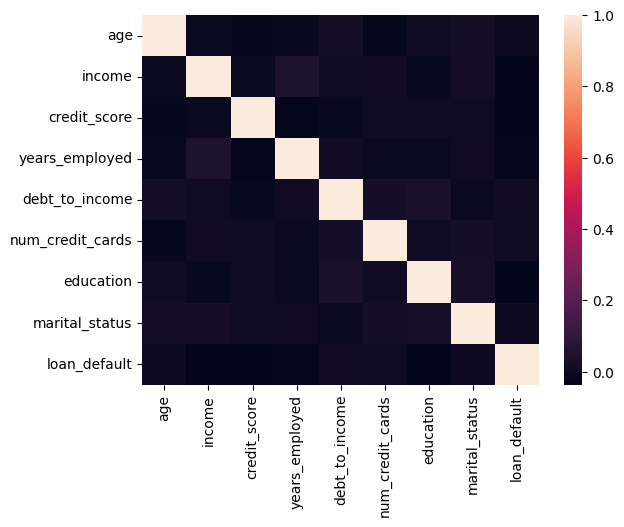

In [73]:
sns.heatmap(training_data_X.corr())

<b>Model Selection (4 marks)</b>
- Implement forward selection using AIC (1)
- Implement backward elimination using AIC (1)
- Compare the selected variables from both methods. Discuss which approach selects more variables and why (1)

<b>Regularisation (5 marks)</b>
- Implement Ridge and Lasso Regression with 5-fold cross validation (2)
- Plot the cross-validation error vs lambda for both methods (1)
- Calculate test set RMSE for all five models (full, forward, backward, Ridge, Lasso) (2)